In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime 
from datetime import date
import holidays

## EXPLORACIÓN INICIAL

In [14]:
df = pd.read_csv('../datos/bikes.csv', index_col = 0)
df.head(2)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801


In [15]:
df.shape

(730, 16)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    object 
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(10), object(2)
memory usage: 97.0+ KB


In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
instant,730.0,365.500000,210.877136,1.000000,183.250000,365.500000,547.750000,730.000000
yr,730.0,0.500000,0.500343,0.000000,0.000000,0.500000,1.000000,1.000000
mnth,730.0,6.526027,3.450215,1.000000,4.000000,7.000000,10.000000,12.000000
holiday,730.0,0.028767,0.167266,0.000000,0.000000,0.000000,0.000000,1.000000
weekday,730.0,2.997260,2.006161,0.000000,1.000000,3.000000,5.000000,6.000000
workingday,730.0,0.683562,0.465405,0.000000,0.000000,1.000000,1.000000,1.000000
weathersit,730.0,1.394521,0.544807,1.000000,1.000000,1.000000,2.000000,3.000000
temp,730.0,20.319259,7.506729,2.424346,13.811885,20.465826,26.880615,35.328347
atemp,730.0,23.726322,8.150308,3.953480,16.889713,24.368225,30.445775,42.044800
hum,730.0,62.765175,14.237589,0.000000,52.000000,62.625000,72.989575,97.250000


In [18]:
df.describe(include = 'object').T

,count,unique,top,freq
dteday,730,730,01-01-2018,1
season,730,4,autumn,188


In [19]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [20]:
df.duplicated().sum()

0

### Outliers

In [21]:
df_numericas = df.select_dtypes(include = np.number)
df_numericas.head(2)

,instant,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801


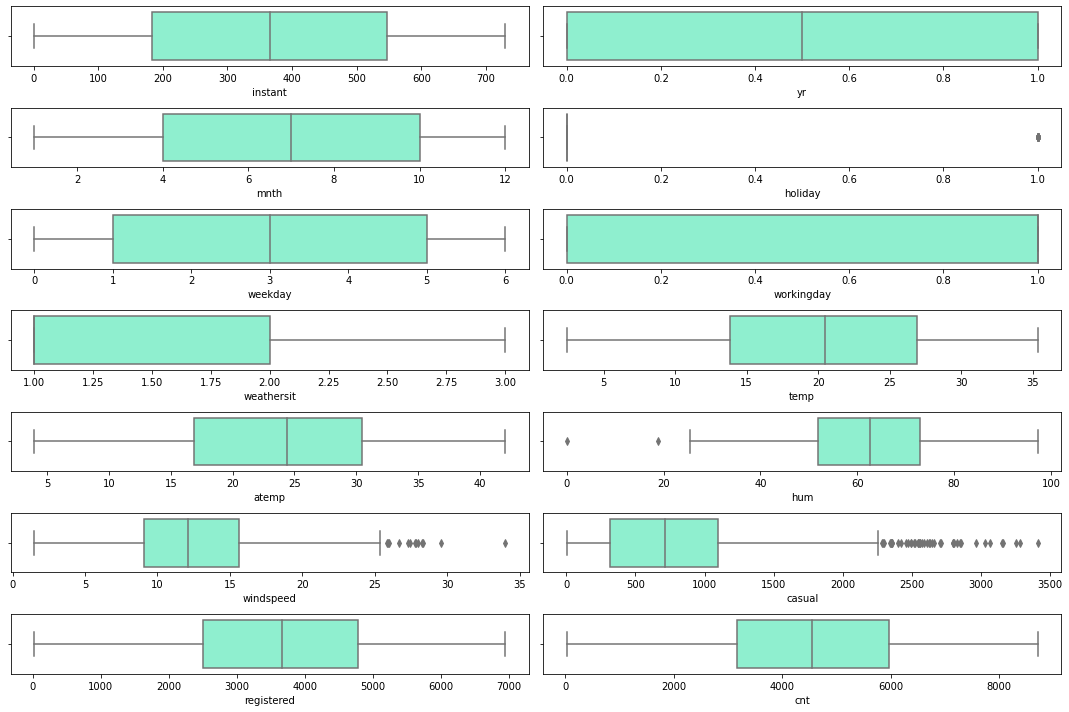

In [22]:
fig, axes = plt.subplots(7, 2, figsize = (15,10))

axes = axes.flat

for indice, columna in enumerate(df_numericas.columns):
    sns.boxplot(x = df_numericas[columna], data = df, ax = axes[indice], color = "aquamarine")
 
plt.tight_layout()
plt.show();

### Renombramos columnas

In [23]:
columnas = {'instant': 'registro', 'dteday': 'fecha', 'season': 'estacion', 'yr': 'año', 'mnth': 'mes', 'holiday': 'festivo',   
            'weekday': 'dia_semana', 'workingday': 'dias_laborables', 'weathersit': 'tiempo', 'temp': 'temperatura', 
            'atemp': 'sensacion_termica', 'hum': 'humedad', 'windspeed': 'velocidad_viento', 'casual': 'usuarios_casuales', 'registered': 'usuarios_registrados', 'cnt': 'total' }

df.rename(columns = columnas, inplace = True)
df.head(0)

,registro,fecha,estacion,año,mes,festivo,dia_semana,dias_laborables,tiempo,temperatura,sensacion_termica,humedad,velocidad_viento,usuarios_casuales,usuarios_registrados,total


### Modificamos el tipo de las columnas

In [24]:
# Modificamos el tipo de la columna 'dteday' al tipo correcto
df['fecha'] = pd.to_datetime(df['fecha'], format='%d-%m-%Y')

In [25]:
df.head()

,registro,fecha,estacion,año,mes,festivo,dia_semana,dias_laborables,tiempo,temperatura,sensacion_termica,humedad,velocidad_viento,usuarios_casuales,usuarios_registrados,total
0,1,2018-01-01,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-01-02,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-01-03,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-01-04,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-01-05,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [26]:
df.dtypes

registro                         int64
fecha                   datetime64[ns]
estacion                        object
año                              int64
mes                              int64
festivo                          int64
dia_semana                       int64
dias_laborables                  int64
tiempo                           int64
temperatura                    float64
sensacion_termica              float64
humedad                        float64
velocidad_viento               float64
usuarios_casuales                int64
usuarios_registrados             int64
total                            int64
dtype: object

### Categorizamos y renombramos columnas

In [27]:
dicc_años = {0: 2018, 1:2019}
df['año'] = df['año'].map(dicc_años)

In [28]:
dicc_mes = { 1: 'Enero',  2:'Febrero',  3:'Marzo',  4:'Abril',  5:'Mayo',  6:'Junio',  7:'Julio',  8:'Agosto',  9:'Septiembre',
            10:'Octubre', 11:'Noviembre', 12:'Diciembre' }

df['mes'] = df['mes'].map(dicc_mes)

In [29]:
df['dia_semana'] = df['fecha'].dt.day_name()

In [30]:
dicc_day = {'Monday':'Lunes', 'Thursday':'Jueves', 'Sunday':'Sabado', 'Tuesday':'Martes', 'Friday':'Viernes', 'Wednesday':'Miercoles',
       'Saturday':'Domingo'}

df['dia_semana'] = df['dia_semana'].map(dicc_day)

Comprobamos que los cambios se han hecho

In [31]:
df.head(2)

,registro,fecha,estacion,año,mes,festivo,dia_semana,dias_laborables,tiempo,temperatura,sensacion_termica,humedad,velocidad_viento,usuarios_casuales,usuarios_registrados,total
0,1,2018-01-01,spring,2018,Enero,0,Lunes,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-01-02,spring,2018,Enero,0,Martes,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801


Observamos que las estaciones no corresponden con la fecha que aparece, ya que Washington está en el hemisferio Norte y las estaciones que aparecían en nuestro df correspondían al hemisferio Sur. Por tanto, las modificamos.

In [32]:
dicc_estacion = {'spring': 'invierno', 'summer':'primavera', 'autumn':'verano', 'winter':'otoño'}

df['estacion'] = df['estacion'].map(dicc_estacion)

In [33]:
df.head(2)

,registro,fecha,estacion,año,mes,festivo,dia_semana,dias_laborables,tiempo,temperatura,sensacion_termica,humedad,velocidad_viento,usuarios_casuales,usuarios_registrados,total
0,1,2018-01-01,invierno,2018,Enero,0,Lunes,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-01-02,invierno,2018,Enero,0,Martes,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801


In [34]:
def categorizar_dia(elemento):
    """
    Esta función categoriza los elementos que le pasemos como parámetro
    Args:
    elemento(int): elemento que queremos categorizar
    Returns: None
    """
    if elemento in ['Sabado', 'Domingo']:
        return 'fin de semana'
    
    else:
        return 'laborable'

In [35]:
df['dias_laborables'] = df['dia_semana'].apply(categorizar_dia)

In [36]:
df.head()

,registro,fecha,estacion,año,mes,festivo,dia_semana,dias_laborables,tiempo,temperatura,sensacion_termica,humedad,velocidad_viento,usuarios_casuales,usuarios_registrados,total
0,1,2018-01-01,invierno,2018,Enero,0,Lunes,laborable,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-01-02,invierno,2018,Enero,0,Martes,laborable,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-01-03,invierno,2018,Enero,0,Miercoles,laborable,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-01-04,invierno,2018,Enero,0,Jueves,laborable,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-01-05,invierno,2018,Enero,0,Viernes,laborable,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [37]:
wa_holidays = holidays.US()

In [38]:
wa_holidays

holidays.country_holidays('US')

In [39]:
def categoria_festivo(elemento):
    if elemento in wa_holidays:
        return 'si'
    
    else:
        return 'no'

In [40]:
df['festivo'] = df['fecha'].apply(categoria_festivo)

In [41]:
df.head(2)

,registro,fecha,estacion,año,mes,festivo,dia_semana,dias_laborables,tiempo,temperatura,sensacion_termica,humedad,velocidad_viento,usuarios_casuales,usuarios_registrados,total
0,1,2018-01-01,invierno,2018,Enero,si,Lunes,laborable,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-01-02,invierno,2018,Enero,no,Martes,laborable,2,14.902598,17.68695,69.6087,16.652113,131,670,801


In [42]:
df['tiempo'].unique()

array([2, 1, 3])

In [43]:
dicc_tiempo = {1: 'despejado', 2: 'nuboso', 3:'lluvioso'}

df['tiempo'] = df['tiempo'].map(dicc_tiempo)

In [46]:
df.head(10)

,registro,fecha,estacion,año,mes,festivo,dia_semana,dias_laborables,tiempo,temperatura,sensacion_termica,humedad,velocidad_viento,usuarios_casuales,usuarios_registrados,total
0,1,2018-01-01,invierno,2018,Enero,si,Lunes,laborable,nuboso,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-01-02,invierno,2018,Enero,no,Martes,laborable,nuboso,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-01-03,invierno,2018,Enero,no,Miercoles,laborable,despejado,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-01-04,invierno,2018,Enero,no,Jueves,laborable,despejado,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-01-05,invierno,2018,Enero,no,Viernes,laborable,despejado,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,2018-01-06,invierno,2018,Enero,no,Domingo,fin de semana,despejado,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,2018-01-07,invierno,2018,Enero,no,Sabado,fin de semana,nuboso,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,2018-01-08,invierno,2018,Enero,no,Lunes,laborable,nuboso,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,2018-01-09,invierno,2018,Enero,no,Martes,laborable,despejado,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,2018-01-10,invierno,2018,Enero,no,Miercoles,laborable,despejado,6.184153,7.54440,48.2917,14.958889,41,1280,1321
